In [2]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import sys
sys.path.append('../creme/')
import custom_model
import creme
import gene as bgene
import utils
import glob
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import pyranges as pr
import shutil
import pickle
import kipoiseq
from itertools import combinations
import scipy
import os
import seqnn
import json

2023-11-14 16:49:40.841572: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
target_df = pd.read_csv('../data/borzoi_targets_human.txt', sep='\t')
cage_tracks = [i for i, t in enumerate(target_df['description']) if ('CAGE' in t) and (t.split(':')[-1].strip() in ['K562 ENCODE, biol_',
                                                                                                               'GM12878 ENCODE, biol_',
                                                                                                               'PC-3'])]

rna_tracks = [i for i, t in enumerate(target_df['description']) if ('RNA' in t) and (t.split(':')[-1].strip() in ['K562',
                                                                                                               'GM12878',
                                                                                                               'PC-3'])]
rna_tracks = list(target_df[target_df['description']=='RNA:blood'].index)

cage_bins = np.arange((16352 - 8) // 2, (16352 + 8) // 2, 1)
model = custom_model.Borzoi('../data/borzoi/f0/*', cage_tracks, rna_tracks, aggregate=True)

Adding models:
['../data/borzoi/f0/model0_best.h5']
Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


2023-11-14 16:49:43.060692: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-14 16:49:43.769886: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 69493 MB memory:  -> device: 0, name: NVIDIA A100 80GB PCIe, pci bus id: 0000:47:00.0, compute capability: 8.0


In [15]:
        cage_tracks = [i for i, t in enumerate(target_df['description']) if
                       ('CAGE' in t) and (t.split(':')[-1].strip() in ['K562 ENCODE, biol_',
                                                                       'GM12878 ENCODE, biol_',
                                                                       'PC-3'])]

        rna_tracks = [i for i, t in enumerate(target_df['description']) if
                      ('RNA' in t) and (t.split(':')[-1].strip() in ['K562',
                                                                     'GM12878',
                                                                     'PC-3'])]

In [13]:
target_df = pd.read_csv('../data/borzoi_targets_human.txt', sep='\t')

In [16]:
target_df.iloc[cage_tracks+rna_tracks]

,Unnamed: 0,identifier,file,clip,clip_soft,scale,sum_stat,strand_pair,description
298,298,CNhs11243+,/home/drk/tillage/datasets/human/cage/fantom/C...,768,384,1.0,sum,299,CAGE:prostate cancer cell line:PC-3
299,299,CNhs11243-,/home/drk/tillage/datasets/human/cage/fantom/C...,768,384,1.0,sum,298,CAGE:prostate cancer cell line:PC-3
870,870,CNhs12332+,/home/drk/tillage/datasets/human/cage/fantom/C...,768,384,1.0,sum,871,CAGE:B lymphoblastoid cell line: GM12878 ENCOD...
871,871,CNhs12332-,/home/drk/tillage/datasets/human/cage/fantom/C...,768,384,1.0,sum,870,CAGE:B lymphoblastoid cell line: GM12878 ENCOD...
872,872,CNhs12336+,/home/drk/tillage/datasets/human/cage/fantom/C...,768,384,1.0,sum,873,CAGE:chronic myelogenous leukemia cell line:K5...
873,873,CNhs12336-,/home/drk/tillage/datasets/human/cage/fantom/C...,768,384,1.0,sum,872,CAGE:chronic myelogenous leukemia cell line:K5...
6112,6112,ENCFF470BSF+,/home/drk/tillage/datasets/human/rna/encode/EN...,768,384,0.3,sum_sqrt,6113,RNA:GM12878
6113,6113,ENCFF470BSF-,/home/drk/tillage/datasets/human/rna/encode/EN...,768,384,0.3,sum_sqrt,6112,RNA:GM12878
6114,6114,ENCFF617ZDV+,/home/drk/tillage/datasets/human/rna/encode/EN...,768,384,0.3,sum_sqrt,6115,RNA:GM12878
6115,6115,ENCFF617ZDV-,/home/drk/tillage/datasets/human/rna/encode/EN...,768,384,0.3,sum_sqrt,6114,RNA:GM12878


In [8]:
data_dir = '../data'
gencode_annotations = pr.read_gtf(f'{data_dir}/gencode.v44.basic.annotation.gtf')
tss_df = gencode_annotations.df.query('Feature=="transcript" & gene_type == "protein_coding"')
tss_df = tss_df.drop_duplicates(subset=['gene_id'])

In [9]:
transcriptome = bgene.Transcriptome('../data/gencode41_basic_nort.gtf')


In [10]:
seq_parser = utils.SequenceParser('../data/GRCh38.primary_assembly.genome.fa')

In [11]:
seq_len = model.seq_length
for i, row in tss_df.iterrows():
    search_gene = 'ENSG00000187164'
    if search_gene in row['gene_id']:
        chrom = row['Chromosome']
        
        # search_gene = row['gene_id']
        center_pos = row['End']
        gene_keys = [gene_key for gene_key in transcriptome.genes.keys() if search_gene in gene_key]
        gene = transcriptome.genes[gene_keys[0]]
        strand = gene.strand
        # start = center_pos - seq_len // 2
        # end = center_pos + seq_len // 2
        # seq_out_start = start + 512
        # seq_out_len = model.target_lengths * 32
        sequence_one_hot = seq_parser.extract_seq_centered(chrom, center_pos, strand, model.seq_length)
        
        # gene_slice = gene.output_slice(seq_out_start, seq_out_len, model.model_strides, False)

        p = model.predict_cage_rna(sequence_one_hot, gene,center_pos, cage_bins=None, return_exons=True, return_all=False)
        print('f')
        
        break





2023-11-14 16:54:20.378826: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8401
2023-11-14 16:54:27.842947: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-11-14 16:54:29.511295: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 497820288 exceeds 10% of free system memory.


f


In [ ]:
model

In [12]:
gene.kv

{'gene_id': 'ENSG00000187164.20',
 'transcript_id': 'ENST00000355371.9',
 'gene_type': 'protein_coding',
 'gene_name': 'SHTN1',
 'transcript_type': 'protein_coding',
 'transcript_name': 'SHTN1-202',
 'exon_number': '1',
 'exon_id': 'ENSE00003841366.1',
 'level': '2',
 'protein_id': 'ENSP00000347532.4',
 'transcript_support_level': '2',
 'hgnc_id': 'HGNC:29319',
 'tag': 'CCDS',
 'ccdsid': 'CCDS44482.1',
 'havana_gene': 'OTTHUMG00000019114.5',
 'havana_transcript': 'OTTHUMT00000504470.2'}

In [27]:
gene_keys = [gene_key for gene_key in transcriptome.genes.keys() if 'ENSG00000169972' in gene_key]
gene_keys

['ENSG00000169972.12']

In [25]:
for i, row in tss_df.iterrows():
    if row['gene_id'] not in transcriptome.genes.keys():
        print(row['gene_id'])

ENSG00000169972.13
ENSG00000157933.11
ENSG00000173673.9
ENSG00000171735.21
ENSG00000251503.8
ENSG00000197312.13
ENSG00000065526.13
ENSG00000270136.6
ENSG00000289694.1
ENSG00000289692.1
ENSG00000133226.19
ENSG00000255054.3
ENSG00000198830.12
ENSG00000159023.23
ENSG00000254553.1
ENSG00000142920.18
ENSG00000283580.4
ENSG00000284989.1
ENSG00000187147.19
ENSG00000197587.12
ENSG00000142973.16
ENSG00000203995.11
ENSG00000271723.5
ENSG00000169174.12
ENSG00000259030.8
ENSG00000184005.12
ENSG00000180488.17
ENSG00000142875.21
ENSG00000097033.15
ENSG00000267561.2
ENSG00000271949.1
ENSG00000271092.5
ENSG00000117569.20
ENSG00000283761.1
ENSG00000240038.8
ENSG00000168765.19
ENSG00000280778.1
ENSG00000178104.22
ENSG00000286185.1
ENSG00000271383.9
ENSG00000160679.14
ENSG00000143569.20
ENSG00000251246.1
ENSG00000260238.6
ENSG00000198400.14
ENSG00000213088.13
ENSG00000254706.3
ENSG00000094975.15
ENSG00000135837.17
ENSG00000289697.1
ENSG00000077157.23
ENSG00000163485.18
ENSG00000058668.16
ENSG00000162772.

In [15]:
p['rna'].sum(axis=1)

array([[119.75,  92.1 , 214.8 ]], dtype=float16)

NameError: name 'gene_slice' is not defined

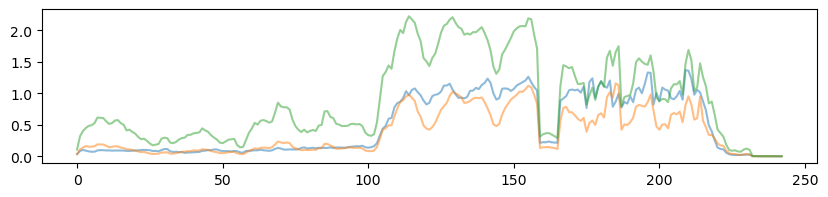

In [11]:
plt.figure(figsize=[10, 2])
plt.plot(p['rna'][0,:, :], alpha=.5)
for g_s in gene_slice:
    plt.vlines(g_s, 0, 1.5, color='r', alpha=0.1)

plt.xlim(11900, 12100)

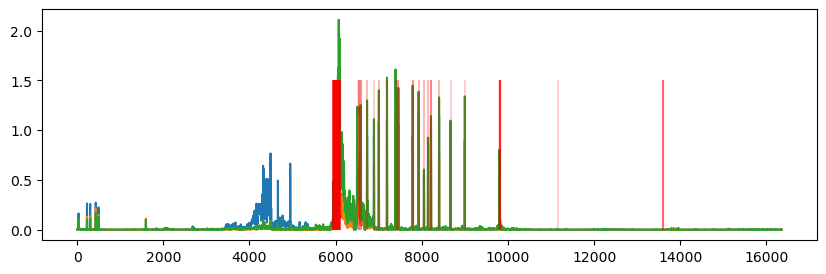

In [30]:
plt.figure(figsize=[10, 3])
plt.plot(p['rna'][0,:, :])
for g_s in gene_slice:
    plt.vlines(g_s, 0, 1.5, color='r', alpha=0.1)

# plt.xlim(11900, 12100)

In [16]:
p['rna'][0,:, 0][::-1].sum()

410.5

In [18]:
p['rna'][0,:, 0][gene_slice].sum()

93.6

In [329]:
search_gene = 'ENSG00000187164'
center_pos = 116952944
chrom = 'chr10'
poses = [116952944]
alts = ['C']

start = center_pos - seq_len // 2
end = center_pos + seq_len // 2

#Get exon bin range
gene_keys = [gene_key for gene_key in transcriptome.genes.keys() if search_gene in gene_key]

gene = transcriptome.genes[gene_keys[0]]

#Determine output sequence start
seq_out_start = start + model.model_strides*model.target_crops
seq_out_len = model.model_strides*model.target_lengths

#Determine output positions of gene exons
gene_slice = gene.output_slice(seq_out_start, seq_out_len, model.model_strides, False)

In [350]:
gene.kv

{'gene_id': 'ENSG00000187164.20',
 'transcript_id': 'ENST00000355371.9',
 'gene_type': 'protein_coding',
 'gene_name': 'SHTN1',
 'transcript_type': 'protein_coding',
 'transcript_name': 'SHTN1-202',
 'exon_number': '1',
 'exon_id': 'ENSE00003841366.1',
 'level': '2',
 'protein_id': 'ENSP00000347532.4',
 'transcript_support_level': '2',
 'hgnc_id': 'HGNC:29319',
 'tag': 'CCDS',
 'ccdsid': 'CCDS44482.1',
 'havana_gene': 'OTTHUMG00000019114.5',
 'havana_transcript': 'OTTHUMT00000504470.2'}

In [15]:
center_pos = 116952944
chrom = 'chr10'

In [16]:
sequence_one_hot = seq_parser.extract_seq_centered(chrom, center_pos, '+', model.seq_length)


In [17]:
rna_tracks = list(target_df[target_df['description']=='RNA:blood'].index)

preds  = model.predict(sequence_one_hot, cage_tracks=cage_tracks, cage_bins=cage_bins, 
                 rna_tracks=rna_tracks, gene_slice=None)

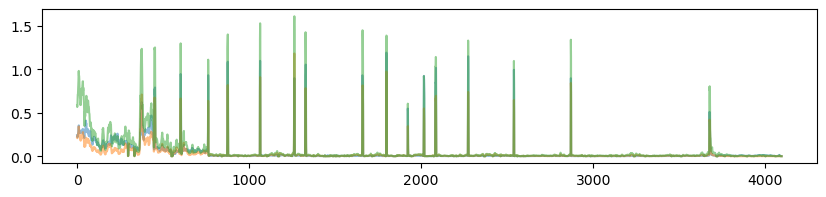

In [18]:
plt.figure(figsize=[10, 2])
plt.plot(preds['rna'][0,6128:10224,:], alpha=0.5)

In [22]:
start = center_pos - seq_len // 2
end = center_pos + seq_len // 2

#Get exon bin range
gene_keys = [gene_key for gene_key in transcriptome.genes.keys() if search_gene in gene_key]

gene = transcriptome.genes[gene_keys[0]]

#Determine output sequence start
seq_out_start = start + model.model_strides*model.target_crops
seq_out_len = model.model_strides*model.target_lengths

#Determine output positions of gene exons
gene_slice = gene.output_slice(seq_out_start, seq_out_len, model.model_strides, False)

In [19]:
y_wt = preds['rna']


    # track_indices,
    # track_names,
    # track_scales,
    # track_transforms,
    # clip_softs,
log_scale=False
sqrt_scale=False
plot_mut=True
plot_window=131072
normalize_window=4096
bin_size=32
pad=16
rescale_tracks=True
normalize_counts=False
save_figs=False
save_suffix="default"
gene_slice=None
anno_df=None



normalize_start = center_pos - normalize_window // 2
normalize_end = center_pos + normalize_window // 2

normalize_start_bin = (normalize_start - start) // bin_size - pad
normalize_end_bin = (normalize_end - start) // bin_size - pad

center_bin = (center_pos - start) // bin_size - pad





# Plot track densities (bins)
y_wt_curr = np.array(np.copy(y_wt), dtype=np.float32)

        
 

In [24]:
y_wt_curr.shape

(1, 16352, 3)

(8000.0, 9000.0)

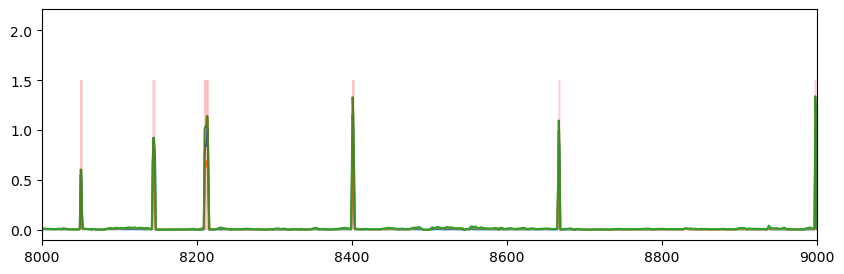

In [26]:
plt.figure(figsize=[10, 3])
plt.plot(y_wt_curr[0])
for p in gene_slice:
    plt.vlines(p, 0, 1.5, color='r', alpha=0.1)

plt.xlim(8000, 9000)

In [341]:
y_wt_curr[7000:8000].argmax()

391

In [331]:
gene_slice

array([ 5927,  5928,  5929,  5930,  5931,  5932,  5933,  5934,  5935,
        5936,  5937,  5938,  5939,  5940,  5941,  5942,  5943,  5944,
        5945,  5946,  5947,  5948,  5949,  5950,  5951,  5952,  5953,
        5954,  5955,  5956,  5957,  5958,  5959,  5960,  5961,  5962,
        5963,  5964,  5965,  5966,  5967,  5968,  5969,  5970,  5971,
        5972,  5973,  5974,  5975,  5976,  5977,  5978,  5979,  5980,
        5981,  5982,  5983,  5984,  5985,  5986,  5987,  5988,  5989,
        5990,  5991,  5992,  5993,  5994,  5995,  5996,  5997,  5998,
        5999,  6000,  6001,  6002,  6003,  6004,  6005,  6006,  6007,
        6008,  6009,  6010,  6011,  6012,  6013,  6014,  6015,  6016,
        6017,  6018,  6019,  6020,  6021,  6022,  6023,  6024,  6025,
        6026,  6027,  6028,  6029,  6030,  6031,  6032,  6033,  6034,
        6035,  6036,  6037,  6038,  6039,  6040,  6041,  6042,  6043,
        6044,  6045,  6046,  6047,  6048,  6049,  6050,  6051,  6052,
        6053,  6054,

In [117]:


        if gene_slice is not None:
            sum_wt = np.sum(y_wt_curr[gene_slice])
            sum_mut = np.sum(y_mut_curr[gene_slice])

            print(" - sum_wt = " + str(round(sum_wt, 4)))
            print(" - sum_mut = " + str(round(sum_mut, 4)))

        y_wt_curr = y_wt_curr[plot_start_bin:plot_end_bin]
        y_mut_curr = y_mut_curr[plot_start_bin:plot_end_bin]

        if log_scale:
            y_wt_curr = np.log2(y_wt_curr + 1.0)
            y_mut_curr = np.log2(y_mut_curr + 1.0)
        elif sqrt_scale:
            y_wt_curr = np.sqrt(y_wt_curr + 1.0)
            y_mut_curr = np.sqrt(y_mut_curr + 1.0)

        max_y_wt = np.max(y_wt_curr)
        max_y_mut = np.max(y_mut_curr)

        if plot_mut:
            max_y = max(max_y_wt, max_y_mut)
        else:
            max_y = max_y_wt

        print(" - max_y_wt = " + str(round(max_y_wt, 4)))
        print(" - max_y_mut = " + str(round(max_y_mut, 4)))
        print(" -- (max_y = " + str(round(max_y, 4)) + ")")

        f = plt.figure(figsize=(12, 2))

        plt.bar(
            np.arange(plot_end_bin - plot_start_bin) + plot_start_bin,
            y_wt_curr,
            width=1.0,
            color="green",
            alpha=0.5,
            label="Ref",
        )

        if plot_mut:
            plt.bar(
                np.arange(plot_end_bin - plot_start_bin) + plot_start_bin,
                y_mut_curr,
                width=1.0,
                color="red",
                alpha=0.5,
                label="Alt",
            )

        xtick_vals = []

        for pas_ix, anno_pos in enumerate(anno_poses):

            pas_bin = int((anno_pos - start) // 32) - 16

            xtick_vals.append(pas_bin)

            bin_end = pas_bin + 3 - 0.5
            bin_start = bin_end - 5

            plt.axvline(
                x=pas_bin,
                color="cyan",
                linewidth=2,
                alpha=0.5,
                linestyle="-",
                zorder=-1,
            )

        plt.scatter(
            [mut_bin],
            [0.075 * max_y],
            color="black",
            s=125,
            marker="*",
            zorder=100,
            label="SNP",
        )

        plt.xlim(plot_start_bin, plot_end_bin - 1)

        plt.xticks([], [])
        plt.yticks([], [])

        plt.xlabel(
            chrom
            + ":"
            + str(plot_start)
            + "-"
            + str(plot_end)
            + " ("
            + str(plot_window)
            + "bp window)",
            fontsize=8,
        )
        plt.ylabel("Signal (log)" if not rescale_tracks else "Signal", fontsize=8)

        plt.title("Track(s): " + str(track_name), fontsize=8)

        plt.legend(fontsize=8)

        plt.tight_layout()

        if save_figs:
            plt.savefig(
                "borzoi_"
                + save_suffix
                + "_track_"
                + str(track_index[0])
                + "_to_"
                + str(track_index[-1])
                + ".png",
                dpi=300,
                transparent=False,
            )
            plt.savefig(
                "borzoi_"
                + save_suffix
                + "_track_"
                + str(track_index[0])
                + "_to_"
                + str(track_index[-1])
                + ".eps"
            )

        plt.show()


[7531, 7532, 7533]

In [119]:
model.target_lengths // 2

8176

In [131]:
list(range(slice_start, slice_end))

[]

In [129]:
gene_slice.extend(range(slice_start, slice_end))

In [130]:
gene_slice

[]

In [104]:
exon_size = []
for gene_id in tqdm(transcriptome.genes.keys()):
    gene = transcriptome.genes[gene_id]
    if gene.kv['transcript_type'] == 'protein_coding':
        exon_size.append(gene.span()[1] - gene.span()[0])
        if exon_size[-1] > 1000:
            print(gene_id)
            
            

100%|████████████████████████████████████████████████████████████████████████████████████| 62700/62700 [00:00<00:00, 308370.71it/s]

ENSG00000186092.7
ENSG00000187634.13
ENSG00000188976.11
ENSG00000187961.15
ENSG00000187583.11
ENSG00000187642.10
ENSG00000188290.11
ENSG00000187608.10
ENSG00000188157.15
ENSG00000237330.3
ENSG00000131591.18
ENSG00000162571.14
ENSG00000186891.14
ENSG00000186827.12
ENSG00000078808.20
ENSG00000176022.7
ENSG00000184163.3
ENSG00000160087.21
ENSG00000162572.21
ENSG00000131584.19
ENSG00000169972.13
ENSG00000127054.22
ENSG00000224051.7
ENSG00000169962.5
ENSG00000107404.21
ENSG00000162576.17
ENSG00000175756.14
ENSG00000221978.13
ENSG00000242485.6
ENSG00000235098.9
ENSG00000205116.4
ENSG00000179403.12
ENSG00000215915.10
ENSG00000160072.20
ENSG00000197785.14
ENSG00000205090.10
ENSG00000160075.12
ENSG00000228594.4
ENSG00000197530.13
ENSG00000189409.14
ENSG00000248333.9
ENSG00000189339.12
ENSG00000008128.23
ENSG00000008130.15
ENSG00000078369.19
ENSG00000169885.10
ENSG00000178821.13
ENSG00000142609.20
ENSG00000187730.9
ENSG00000067606.17
ENSG00000162585.17
ENSG00000157933.11
ENSG00000116151.14
ENSG0

(0.0, 100000.0)

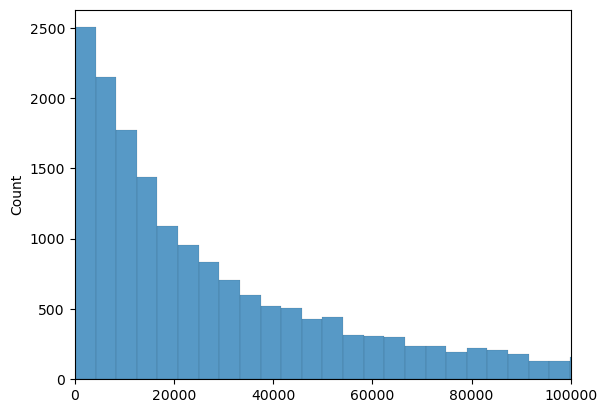

In [191]:
sns.histplot(exon_size)
plt.xlim(0,100000)

In [82]:
np.max(exon_size)

2473539

In [81]:
gencode_annotations = pr.read_gtf(f'../data//gencode.v44.basic.annotation.gtf')
tss_df = gencode_annotations.df.query('Feature=="transcript" & gene_type == "protein_coding"')

In [92]:
tss_df[(tss_df['Strand'] == '-') & (tss_df['gene_name'] == 'KCNK9')]


,Chromosome,Source,Feature,Start,End,Score,Strand,Frame,gene_id,gene_type,...,transcript_support_level,havana_transcript,exon_number,exon_id,hgnc_id,havana_gene,ont,protein_id,ccdsid,artif_dupl
901821,chr8,HAVANA,transcript,139601096,139703093,.,-,.,ENSG00000169427.8,protein_coding,...,NaN,OTTHUMT00000497858.1,NaN,NaN,HGNC:6283,OTTHUMG00000164186.8,NaN,ENSP00000496915.1,CCDS6377.1,NaN
901832,chr8,ENSEMBL,transcript,139612560,139702998,.,-,.,ENSG00000169427.8,protein_coding,...,1,NaN,NaN,NaN,HGNC:6283,OTTHUMG00000164186.8,NaN,ENSP00000302166.1,CCDS6377.1,NaN
901843,chr8,HAVANA,transcript,139617120,139703123,.,-,.,ENSG00000169427.8,protein_coding,...,1,OTTHUMT00000378473.3,NaN,NaN,HGNC:6283,OTTHUMG00000164186.8,NaN,ENSP00000430676.1,CCDS6377.1,NaN
901852,chr8,HAVANA,transcript,139617120,139704109,.,-,.,ENSG00000169427.8,protein_coding,...,NaN,OTTHUMT00000497859.1,NaN,NaN,HGNC:6283,OTTHUMG00000164186.8,NaN,ENSP00000498198.1,CCDS6377.1,NaN
901861,chr8,HAVANA,transcript,139617158,139654330,.,-,.,ENSG00000169427.8,protein_coding,...,NaN,OTTHUMT00000497860.2,NaN,NaN,HGNC:6283,OTTHUMG00000164186.8,NaN,ENSP00000497893.1,NaN,NaN


In [88]:
tss_positions = [row['Start'] if row['Strand']=='+' else row['End'] for _, row in tss_df.iterrows()]

In [52]:
tss_df[(tss_df['havana_transcript'] == 'OTTHUMT00000504470.2') & (tss_df['transcript_support_level']== '2')]

,Chromosome,Source,Feature,Start,End,Score,Strand,Frame,gene_id,gene_type,...,transcript_support_level,havana_transcript,exon_number,exon_id,hgnc_id,havana_gene,ont,protein_id,ccdsid,artif_dupl
1063282,chr10,HAVANA,transcript,116881476,117005187,.,-,.,ENSG00000187164.20,protein_coding,...,2,OTTHUMT00000504470.2,NaN,NaN,HGNC:29319,OTTHUMG00000019114.5,NaN,ENSP00000347532.4,CCDS44482.1,NaN


In [54]:
tss_df[tss_df['Feature']=='exon']

,Chromosome,Source,Feature,Start,End,Score,Strand,Frame,gene_id,gene_type,...,transcript_support_level,havana_transcript,exon_number,exon_id,hgnc_id,havana_gene,ont,protein_id,ccdsid,artif_dupl


In [55]:
gtf_in = open(f'../data//gencode.v44.basic.annotation.gtf')

In [56]:
# ignore header
line = gtf_in.readline()
while line[0] == "#":
    line = gtf_in.readline()

In [57]:
line


'chr1\tHAVANA\tgene\t11869\t14409\t.\t+\t.\tgene_id "ENSG00000290825.1"; gene_type "lncRNA"; gene_name "DDX11L2"; level 2; tag "overlaps_pseudogene";\n'

In [58]:
while line:
    a = line.split("\t")
    if a[2] == "exon":
        chrom = a[0]
        break

KeyboardInterrupt: 